### Gabor Filtering

Gabor filters are linear filters used in image processing for texture analysis and edge detection. They are particularly powerful because they capture both spatial frequency and orientation, making them well-suited for analyzing complex patterns like those found in medical or biological images.

Gabor filters simulate how human visual systems perceive textures and are excellent at detecting edges, directions, and repetitive structures in images.

#### Steps for Feature Extraction

- Load and convert the image to grayscale for uniformity in processing.

- Define the Gabor filter parameters:

    -   ksize: Size of the filter kernel.

    -   sigma: Standard deviation of the Gaussian envelope.

    - theta: Orientation of the normal to the parallel stripes of the Gabor function.

    - lambd: Wavelength of the sinusoidal factor.

    - gamma: Aspect ratio (ellipticity).

    - psi: Phase offset of the sinusoidal function.

- Apply multiple Gabor filters using varying theta (orientations) and lambd (wavelengths).

- Extract the filtered outputs and optionally flatten them into feature vectors for downstream tasks.

#### Returns

- A set of filtered images, each emphasizing different orientations and frequencies of patterns in the input.

- Each filtered output can be flattened into a 1D feature vector, suitable for feeding into ML models.

#### Advantages

- Captures texture and directional information effectively.

- Sensitive to both frequency and orientation, making it robust for pattern recognition.

- Mimics the behavior of the human visual system for texture discrimination.

- Effective even in low-contrast or noisy regions of the image

#### For further info follow the links below:

[Feature Extraction in Image Processing: Techniques and Applications](https://www.geeksforgeeks.org/feature-extraction-in-image-processing-techniques-and-applications/)

[OpencV getGaborKernel() Method](https://www.geeksforgeeks.org/opencv-getgaborkernel-method/)

[Through The Eyes of Gabor Filter](https://medium.com/@anuj_shah/through-the-eyes-of-gabor-filter-17d1fdb3ac97)

Original grayscale image shape: (453, 497) 



,lambd_value,theta_value,gabor_feature
0,0.40,0°,"[29, 31, 34, 32, 33, 32, 34, 37, 32, 34, 33, 3..."
1,0.40,45°,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
2,0.40,90°,"[174, 174, 174, 174, 174, 176, 179, 184, 190, ..."
3,0.40,135°,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
4,0.50,0°,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
5,0.50,45°,"[2, 7, 3, 6, 4, 4, 6, 1, 8, 1, 6, 4, 5, 4, 5, ..."
6,0.50,90°,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
7,0.50,135°,"[2, 7, 3, 6, 4, 4, 6, 1, 8, 1, 6, 4, 5, 4, 5, ..."
8,0.55,0°,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
9,0.55,45°,"[117, 118, 116, 116, 115, 115, 116, 114, 114, ..."


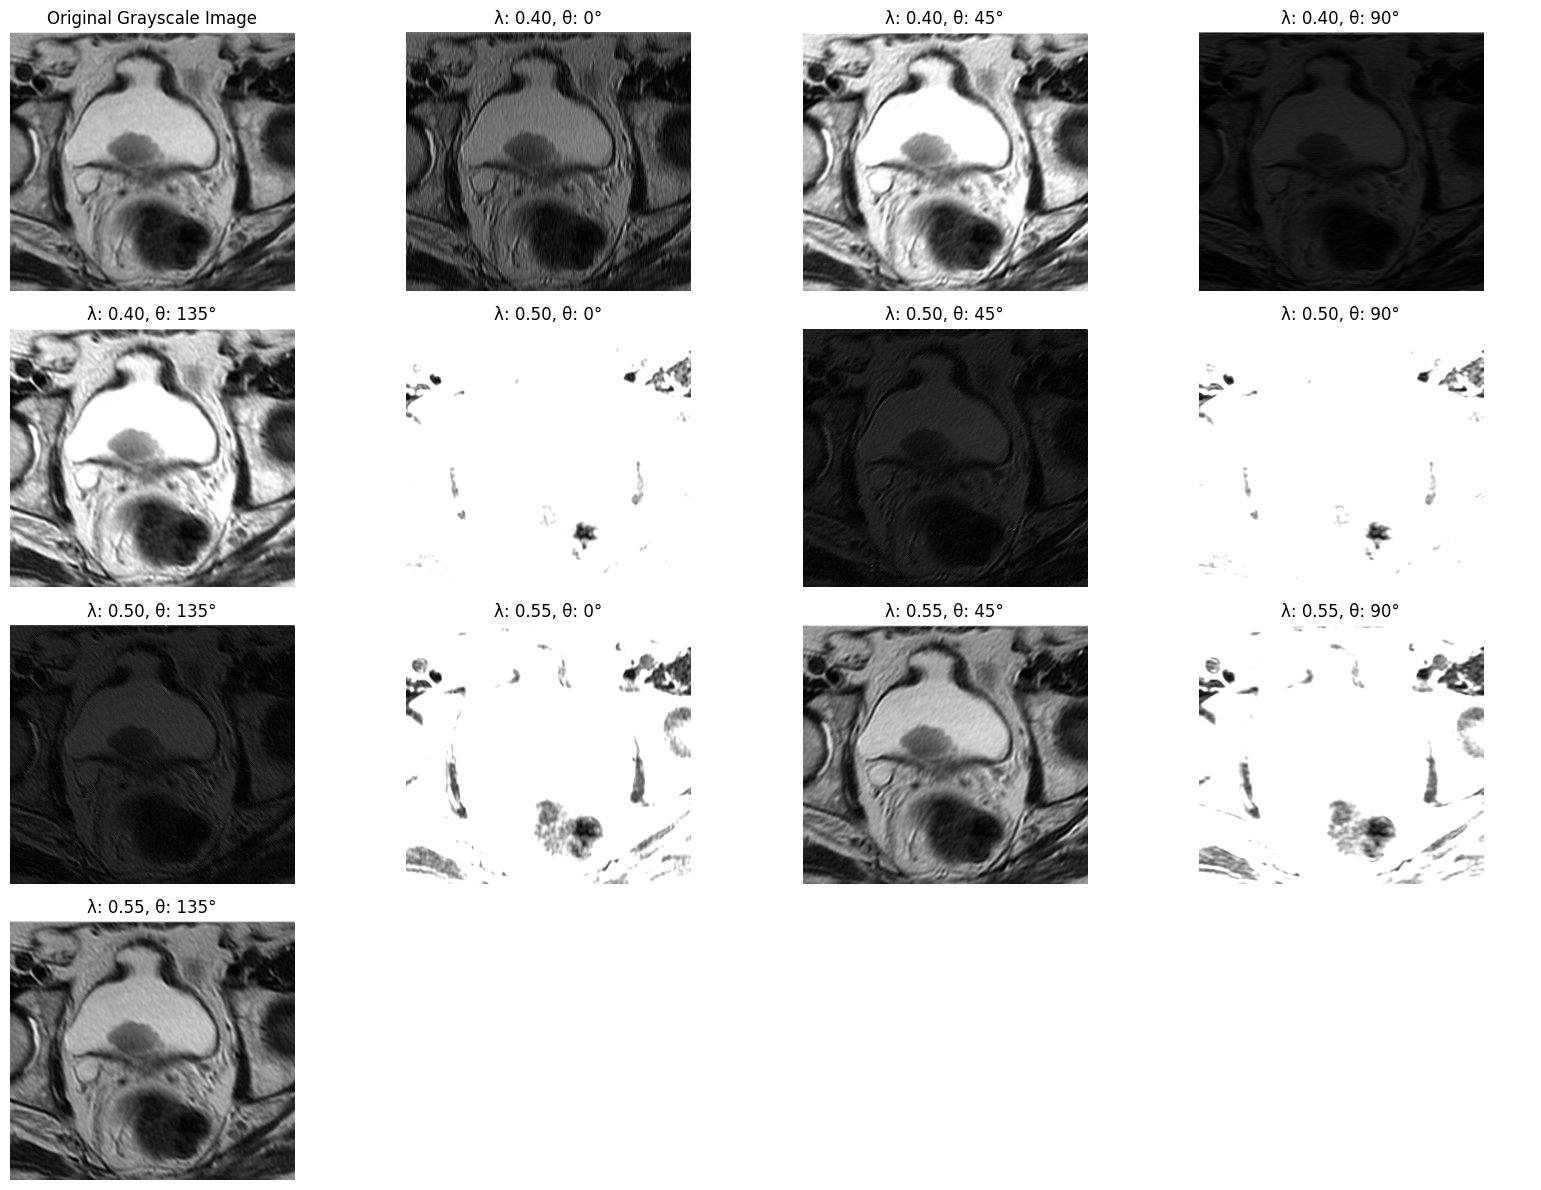

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Read and preprocess the image
image_path = 'cancer.jpg'
original_image = cv.imread(image_path)

if original_image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Convert to grayscale
gray_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)

# Step 2: Define Gabor filter parameters
ksize = 10                        # Size of the Gabor kernel
sigma = 1.0                       # Standard deviation of the Gaussian envelope
lambd_values = [0.4, 0.5, 0.55]   # Wavelengths of the sinusoidal component
gamma = 0.5                       # Spatial aspect ratio (aspect of Gaussian)
psi = 0                           # Phase offset
angles = np.arange(0, np.pi, np.pi / 4)  # Orientations: 0°, 45°, ..., 135°

# Step 3: Apply Gabor filters to the image
gabor_features = []
titles = []

for lambd in lambd_values:
    for theta in angles:
        # Create Gabor kernel
        gabor_kernel = cv.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi)

        # Filter the image using the Gabor kernel
        filtered_image = cv.filter2D(gray_image, cv.CV_8UC3, gabor_kernel)

        # Store the result
        gabor_features.append(filtered_image)
        angle_deg = int(theta * (180 / np.pi))
        titles.append(f"λ: {lambd:.2f}, θ: {angle_deg}°")

# Step 4: Print feature details
print("Original grayscale image shape:", gray_image.shape, "\n")

# Create a list to collect records
all_features = []

for idx, feature in enumerate(gabor_features):
    flattened = feature.reshape(-1)
    # Create a dictionary with the feature and its index
    all_features.append({
        'lambd_value': titles[idx].split(',')[0].split(':')[1],
        'theta_value': titles[idx].split(',')[1].split(':')[1],
        'gabor_feature': flattened.tolist()  # Convert to list to store properly in DataFrame
    })
    # print(f"Gabor Feature {idx}: Shape = {feature.shape}, Length = {len(flattened)}")
    # print(flattened)
    # print()

# Convert list of dictionaries to DataFrame
feature_df = pd.DataFrame(all_features)

# Display the DataFrame (use display only in Jupyter)
display(feature_df)


# Step 5: Visualization
num_features = len(gabor_features)
num_cols = 4
num_rows = int(np.ceil((num_features + 1) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 3))
axes = axes.ravel()

# Plot the original grayscale image
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

# Plot each Gabor-filtered result
for idx, (img, title) in enumerate(zip(gabor_features, titles), start=1):
    axes[idx].imshow(img, cmap='gray')
    axes[idx].set_title(title)
    axes[idx].axis('off')

# Hide unused subplots
for i in range(len(gabor_features) + 1, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()
